In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

2022년도 데이터 
이용정보 데이터: https://data.seoul.go.kr/dataList/OA-15245/F/1/datasetView.do#

달별 데이터에서 2022년 데이터로 합치기

In [19]:
bike_01 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.01.csv', encoding='cp949')
bike_02 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.02.csv', encoding='cp949')
bike_03 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.03.csv', encoding='cp949')
bike_04 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.04.csv', encoding='cp949')
bike_05 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.05.csv', encoding='cp949')
bike_06 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.06.csv', encoding='cp949')
bike_07 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.07.csv', encoding='cp949')
bike_08 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.08.csv', encoding='cp949')
bike_09 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.09.csv', encoding='cp949')
bike_10 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.10.csv', encoding='cp949')
bike_11 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.11.csv', encoding='cp949')
bike_12 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_22.12.csv', encoding='cp949')

bike_2022= pd.concat([bike_01, bike_02,bike_03, bike_04, bike_05, bike_06, bike_07, bike_08, bike_09, bike_10, bike_11, bike_12])

In [20]:
bike_2022

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-01-01,0,1725,1725. 창1동주민센터,정기권,NaN,~10대,1,0.00,0.00,0.00,44
1,2022-01-01,0,1167,1167. 마곡수명산파크3단지 교차로,정기권,NaN,~10대,1,52.51,0.51,2210.00,15
2,2022-01-01,0,1059,1059. 래미안 강동팰리스(102동),정기권,NaN,~10대,1,25.66,0.25,1080.00,4
3,2022-01-01,0,3794,3794. 안양천합수부(현대3차아파트),정기권,NaN,~10대,1,49.61,0.50,2160.00,15
4,2022-01-01,0,4014,4014. 당고개역 3번 출구,정기권,NaN,~10대,1,23.60,0.22,961.30,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1638964,2022-12-31,23,262,262. 영문초등학교 사거리,정기권,M,기타,1,29.15,0.21,920.00,5
1638965,2022-12-31,23,201,201. 진미파라곤 앞,정기권,M,기타,1,15.36,0.10,430.88,3
1638966,2022-12-31,23,1008,1008. 암사역 3번출구(국민은행앞),정기권,M,기타,1,36.83,0.29,1240.00,7
1638967,2022-12-31,23,1637,1637. KT 전화국 버스정류장 옆,정기권,M,기타,1,222.14,2.00,8630.00,87


결측지 확인 

In [21]:
bike_2022.isna().sum()

대여일자              0
대여시간              0
대여소번호             0
대여소명              0
대여구분코드            0
성별         12315127
연령대코드             0
이용건수              0
운동량               0
탄소량               0
이동거리(M)           0
이용시간(분)           0
dtype: int64

사용하고자하는 데이터에는 결측지 없음 

In [22]:
bike_time=bike_2022.groupby(['대여일자', '대여시간'])['이용건수'].sum()
bike_time = bike_time.reset_index() #인덱스 재 정렬 , 기존 인덱스를 열로
bike_time

,대여일자,대여시간,이용건수
0,2022-01-01,0,575
1,2022-01-01,1,466
2,2022-01-01,2,328
3,2022-01-01,3,250
4,2022-01-01,4,246
...,...,...,...
8754,2022-12-31,19,2026
8755,2022-12-31,20,1750
8756,2022-12-31,21,1747
8757,2022-12-31,22,1618


대여일자에서 년도, 월, 일, 요일, 공휴일 변수 생성
대여일시에서 시간 변수 생성

In [70]:
# 년,월,일,요일 생성
bike_time['대여일자'] = pd.to_datetime(bike_time['대여일자'] )
bike_time['년도'] = bike_time['대여일자'].dt.year
bike_time['월'] = bike_time['대여일자'].dt.month
bike_time['일'] = bike_time['대여일자'].dt.day
bike_time['요일(num)'] = bike_time['대여일자'].dt.dayofweek
bike_time['공휴일'] = 0 #0: 평일 1: 공휴일
# 이번에는 토요일 일요일만 공휴일로 변경하고자 함
bike_time.loc[bike_time['요일(num)'].isin([5,6]),['공휴일']] = 1

bike_time.sample(10)

,대여일자,대여시간,이용건수,년도,월,일,요일(num),공휴일,시간
5154,2022-08-03,19,9794,2022,8,3,2,0,19:00
6792,2022-10-11,1,1207,2022,10,11,1,0,1:00
7644,2022-11-15,13,4588,2022,11,15,1,0,13:00
356,2022-01-15,20,1940,2022,1,15,5,1,20:00
6390,2022-09-24,7,3048,2022,9,24,5,1,7:00
6038,2022-09-09,15,7216,2022,9,9,4,0,15:00
5633,2022-08-23,18,19059,2022,8,23,1,0,18:00
4730,2022-07-17,2,2075,2022,7,17,6,1,2:00
7271,2022-10-31,0,2417,2022,10,31,0,0,0:00
6244,2022-09-18,5,910,2022,9,18,6,1,5:00


미세먼지 경보 발령 22년도 정보 : https://www.airkorea.or.kr/web/pmWarning?pMENU_NO=115

In [120]:
#엑셀 파일 불러오기 
conda install -c conda-forge xlrd

Retrieving notices: ...working... DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
done
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Startin

In [190]:
#0-2행까지가 Nan값
dust = pd.read_excel('미세먼지 경보발령.xls', header=3)

In [191]:
# '발령시간'과 '해제시간'을 날짜와 시간으로 분할
dust['발령날짜'] = pd.to_datetime(dust['발령시간'].str.replace(' 24', ' 00')).dt.date
dust['발령시각'] = pd.to_datetime(dust['발령시간'].str.replace(' 24', ' 00')).dt.time
dust['해제날짜'] = pd.to_datetime(dust['해제시간']).dt.date
dust['해제시각'] = pd.to_datetime(dust['해제시간']).dt.time

# 결과 확인
print(dust[['발령날짜', '발령시각', '해제날짜', '해제시각']])


         발령날짜      발령시각        해제날짜      해제시각
0  2022-12-13  17:00:00  2022-12-13  18:00:00
1  2022-12-13  10:00:00  2022-12-13  17:00:00
2  2022-12-13  04:00:00  2022-12-13  10:00:00
3  2022-11-09  00:00:00  2022-11-11  05:00:00
4  2022-04-27  06:00:00  2022-04-27  23:00:00
5  2022-03-05  08:00:00  2022-03-05  12:00:00
6  2022-03-05  01:00:00  2022-03-05  04:00:00
7  2022-02-11  23:00:00  2022-02-13  21:00:00
8  2022-01-08  22:00:00  2022-01-10  21:00:00


In [185]:
# 발령시간과 해제시간 열 삭제
dust = dust.drop(['발령시간', '해제시간'], axis=1)

dust.head()

,지역,권역,항목,경보단계,미세먼지 경보 발령 여부,발령날짜,발령시각,해제날짜,해제시각
0,서울,서울권역,PM10,주의보,0,2022-12-13,17:00:00,2022-12-13,18:00:00
1,서울,서울권역,PM10,경보,0,2022-12-13,10:00:00,2022-12-13,17:00:00
2,서울,서울권역,PM10,주의보,0,2022-12-13,04:00:00,2022-12-13,10:00:00
3,서울,서울권역,PM2.5,주의보,0,2022-11-09,00:00:00,2022-11-11,05:00:00
4,서울,서울권역,PM10,주의보,0,2022-04-27,06:00:00,2022-04-27,23:00:00


In [186]:
dust.isna().sum()

지역               0
권역               0
항목               0
경보단계             0
미세먼지 경보 발령 여부    0
발령날짜             0
발령시각             0
해제날짜             0
해제시각             0
dtype: int64

2022년도 기상청 날씨

날씨 데이터 : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36&tabNo=1

In [71]:
weather = pd.read_csv('seoul_weather.csv', encoding='cp949')
weather.head(5)

,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,108,2022-01-01 00:01,-8.5,0.0,297.3,1.6,1021.8,1033.1,41.3,0.0,0.0
1,108,2022-01-01 00:02,-8.5,0.0,293.5,1.2,1021.8,1033.1,41.2,0.0,0.0
2,108,2022-01-01 00:03,-8.5,0.0,328.0,1.7,1021.9,1033.2,41.0,0.0,0.0
3,108,2022-01-01 00:04,-8.6,0.0,311.4,1.9,1021.9,1033.2,41.2,0.0,0.0
4,108,2022-01-01 00:05,-8.6,0.0,312.4,1.3,1021.8,1033.1,41.4,0.0,0.0


일시에서 시간 일시로 나누기

In [74]:
weather['일시'] = weather['일시'].astype(str)

weather['날짜'] = weather['일시'].str[:10]  
weather['시간'] = weather['일시'].str[11:13].astype(int)  

결측지 확인

In [75]:
weather.isnull().sum()

지점                0
일시                0
기온(°C)          132
누적강수량(mm)     16470
풍향(deg)         105
풍속(m/s)         106
현지기압(hPa)        35
해면기압(hPa)        32
습도(%)             8
일사(MJ/m^2)       40
일조(Sec)          46
날짜                0
시간                0
dtype: int64

In [76]:
# 날짜 시간으로 정렬 (되어있더라도 확실하게 하기위해 한번 더 정렬)
weather = weather.sort_values(['날짜','시간'])
# 전 값으로 채우기 같은 메소드는 이미 만들어져 있음!! 찾아보기 
weather['기온(°C)'].fillna(method='ffill',inplace = True)
weather['누적강수량(mm)'].fillna(method='ffill',inplace = True)
weather['풍속(m/s)'].fillna(method='ffill',inplace = True)
weather['습도(%)'].fillna(method='ffill',inplace = True)

In [88]:
weather['날짜'] = pd.to_datetime(weather['날짜'])
#데이터 타입 맞추기 
bike_mg = pd.merge (bike_time, 
                       weather, 
                       left_on =['대여일자', '대여시간'], 
                       right_on = ['날짜', '시간']) #default = inner 
bike_mg.head()

,대여일자,대여시간,이용건수,년도,월,일,요일(num),공휴일,시간_x,지점,...,누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),날짜,시간_y
0,2022-01-01,0,575,2022,1,1,5,1,0:00,108,...,0.0,297.3,1.6,1021.8,1033.1,41.3,0.0,0.0,2022-01-01,0
1,2022-01-01,0,575,2022,1,1,5,1,0:00,108,...,0.0,293.5,1.2,1021.8,1033.1,41.2,0.0,0.0,2022-01-01,0
2,2022-01-01,0,575,2022,1,1,5,1,0:00,108,...,0.0,328.0,1.7,1021.9,1033.2,41.0,0.0,0.0,2022-01-01,0
3,2022-01-01,0,575,2022,1,1,5,1,0:00,108,...,0.0,311.4,1.9,1021.9,1033.2,41.2,0.0,0.0,2022-01-01,0
4,2022-01-01,0,575,2022,1,1,5,1,0:00,108,...,0.0,312.4,1.3,1021.8,1033.1,41.4,0.0,0.0,2022-01-01,0


In [89]:
#시간 time
bike_mg['시간'] = bike_mg['대여시간'].astype(str) + ':00'

In [90]:
bike_mg = bike_mg.drop(['대여일자', '지점','일시','풍향(deg)','현지기압(hPa)','해면기압(hPa)','일사(MJ/m^2)','일조(Sec)','날짜','시간_x','시간_y'], axis = 1)

In [95]:
# 칼럼 선택
bike_mg = bike_mg[['년도', '월', '일', '요일(num)', '공휴일','시간','이용건수','기온(°C)',
       '누적강수량(mm)', '풍속(m/s)','습도(%)', ]]

#칼럼명 변경
bike_mg.columns = ['년도','월','일','요일','공휴일','시간','이용건수', '기온', '강수량(mm)','풍속(m/s)','습도(%)']

In [96]:
bike_mg.isnull().sum()

년도         0
월          0
일          0
요일         0
공휴일        0
시간         0
이용건수       0
기온         0
강수량(mm)    0
풍속(m/s)    0
습도(%)      0
dtype: int64

In [97]:
#저장
bike_mg.to_csv('bike_mg.csv', index = False, encoding='utf-8-sig')
#불러오기
bike_mg = pd.read_csv('bike_mg.csv')

In [98]:
data = bike_mg.copy()

In [99]:
desc_df = data.describe().T
desc_df

,count,mean,std,min,25%,50%,75%,max
년도,522847.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
월,522847.0,6.529744,3.454827,1.0,4.0,7.0,10.0,12.0
일,522847.0,15.710604,8.798619,1.0,8.0,16.0,23.0,31.0
요일,522847.0,3.004787,1.996753,0.0,1.0,3.0,5.0,6.0
공휴일,522847.0,0.286900,0.452315,0.0,0.0,0.0,1.0,1.0
이용건수,522847.0,4664.618298,3993.486614,2.0,1390.0,3659.0,6760.0,22631.0
기온,522847.0,13.244501,11.336232,-13.7,4.1,14.7,23.2,36.1
강수량(mm),522847.0,2.211521,10.784710,0.0,0.0,0.0,0.0,176.2
풍속(m/s),522847.0,2.365869,1.279822,0.0,1.5,2.2,3.0,13.6
습도(%),522847.0,64.471916,18.485642,15.3,50.5,64.9,79.3,100.0


<Axes: xlabel='이용건수', ylabel='Count'>

/Users/jiyoungjung/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/Users/jiyoungjung/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
/Users/jiyoungjung/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/Users/jiyoungjung/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/Users/jiyoungjung/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyoungjung/anaconda3/lib/python3.11/s

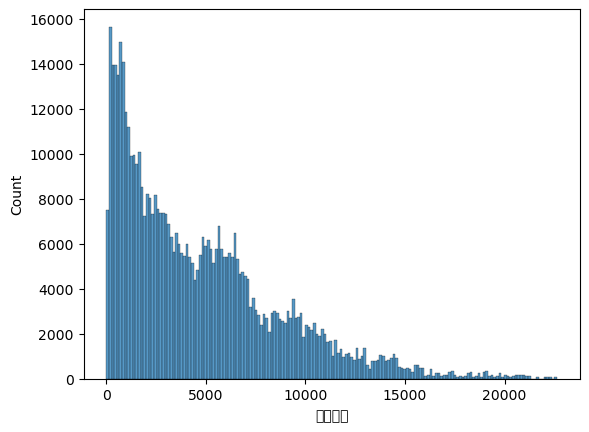

In [105]:
sns.histplot(data['이용건수'])

In [ ]:
sns.boxplot(data['이용건수'])

아웃라이어 조정or제거 

In [ ]:
sns.lineplot(x=data['년도'].map(str) + data['월'].map(str), y=data['이용건수'])

In [ ]:
fig, axes = plt.subplots(2,5, figsize = (20,8))
ax = axes.flatten()
# axes = (n,n)형태 / ax = m형태
for i, col in enumerate(con_cols):
  sns.histplot(data = data, x = col, ax = ax[i])

In [ ]:
# 다양한 그래프 subplot으로 나타내기
# 연속성 데이터는 line, 범주형 데이터는 bar그래프로 그려보기 
# figure 크기 설정
fig, axes = plt.subplots(3,3, figsize = (20,8))
# 그래프 그리기
sns.barplot(data = data, x = '월', y= '이용건수', ax = axes[0,0])
sns.barplot(data = data, x = '시간', y= '이용건수', ax = axes[0,1])
sns.barplot(data = data, x = '공휴일', y= '이용건수', ax = axes[0,2])
sns.lineplot(data = data, x = '기온', y= '이용건수', ax = axes[1,0])
sns.barplot(data = data, x = '대여시간', y= '이용건수', ax = axes[1,1])
sns.lineplot(data = data, x = '강수량(mm)', y= '이용건수', ax = axes[1,2])
#제목 넣기 
axes[0,0].set_title('월별 이용건수')
axes[0,1].set_title('시간대별 이용건수')
axes[0,2].set_title('공휴일여부에 따른 이용건수')
axes[1,0].set_title('기온별 이용건수')
axes[1,1].set_title('대여시간별 이용건수')
axes[1,2].set_title('강수량(mm)별 이용건수')
# 간격두기
fig.subplots_adjust(hspace = 0.4)